In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text data into numerical values
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
raw_mail_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Models/Spam Mail Prediction/mail_data.csv')

In [39]:
# Replacing NULL values with NULL String
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [40]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
mail_data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [43]:
mail_data.shape

(5572, 2)

In [44]:
mail_data['Category'].value_counts()

,count
Category,
ham,4825
spam,747


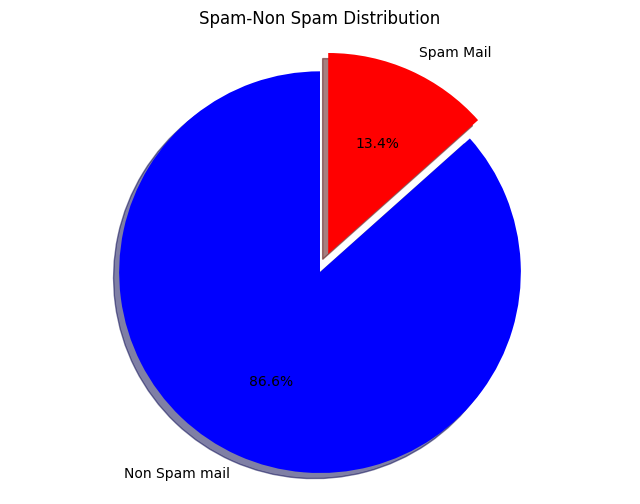

In [45]:
spam_mail_distribution = mail_data['Category'].value_counts()

# Create a pie chart
labels = ['Non Spam mail', 'Spam Mail']
sizes = spam_mail_distribution.values  # Corresponding counts
colors = ['blue', 'red']  # Custom colors
explode = (0.1, 0)  # Explode the first slice (if Male is first)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow = True,startangle=90)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.title('Spam-Non Spam Distribution')
plt.show()

In [46]:
# Encoding categorical data so machine can understand better
# Label spam as 0;ham mail as 1
mail_data.replace({'Category':{'spam':0,'ham':1}}, inplace=True)

<ipython-input-46-f58682cf14db>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mail_data.replace({'Category':{'spam':0,'ham':1}}, inplace=True)


In [47]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
# Seperating data as text and labels
X = mail_data['Message']
Y = mail_data['Category']

In [77]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


In [68]:
# Splitting Data into Train , Test , Validation
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.1, random_state=3)

In [69]:
# Splitting Train and Validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1, random_state=3)

In [70]:
print(X.shape, X_train.shape, X_val.shape, X_test.shape)

(5572,) (4512,) (502,) (558,)


In [73]:
# Feature Extraction - Transforming text data to feature vectors that can be used as input in logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

# splits text into tokens and calculates frequency of each token but excludes stop_words list

# min_df : terms that appear at least 1(more than 1) once are included.
# stop_words : Excludes Common english words
# lowercase : Converts all textual data to lowercase before converting it

# used for converting a collection of text documents into a matrix of TF-IDF features. TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to convert textual data
# into numerical form while emphasizing words that are more unique or important in each document.

In [74]:
X_train_features = feature_extraction.fit_transform(X_train) # fitting data in vectorizer and transforming it into feature vector
X_val_features = feature_extraction.transform(X_val) # already fitted data so we only transform it into feature vector
X_test_features = feature_extraction.transform(X_test) # already fitted data so we only transform it into feature vector

In [78]:
print(X_train_features)

  (0, 2155)	0.17361571524660005
  (0, 7086)	0.17822065627394496
  (0, 3645)	0.24786438716459616
  (0, 7454)	0.2835984895102277
  (0, 2800)	0.2369083788978361
  (0, 1093)	0.22674620871657528
  (0, 1944)	0.18793848967617152
  (0, 6928)	0.1631603955973
  (0, 1699)	0.19732427018333584
  (0, 684)	0.2346286002885631
  (0, 304)	0.18735460352027
  (0, 4534)	0.2937606596914885
  (0, 6452)	0.23934550435153212
  (0, 398)	0.23934550435153212
  (0, 5706)	0.2304679960402525
  (0, 7163)	0.2512311533274076
  (0, 3967)	0.2591135448993954
  (0, 319)	0.20226126410574297
  (0, 7523)	0.26927571508065623
  (1, 5057)	0.4436976970671704
  (1, 5073)	0.2903706631788781
  (1, 3728)	0.5112352415359035
  (1, 1857)	0.4122945272348999
  (1, 3976)	0.5361613397161575
  (2, 7403)	1.0
  :	:
  (4507, 2361)	0.379330483218884
  (4507, 6754)	0.379330483218884
  (4508, 3792)	0.2200676647806377
  (4508, 6669)	0.31339749785934395
  (4508, 5794)	0.46120422765079044
  (4508, 4476)	0.47438950172141825
  (4508, 3594)	0.45043107431

In [79]:
model = LogisticRegression()

In [80]:
# Training the model
model.fit(X_train_features, Y_train)

LogisticRegression()

In [84]:
# Predicting values on training data
training_data_prediction = model.predict(X_train_features)
training_data_accuracy = accuracy_score(Y_train, training_data_prediction)

print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.96875


In [85]:
# Predicting values on validaiton data
testing_data_prediction = model.predict(X_test_features)
validaiton_data_accuracy = accuracy_score(Y_test, testing_data_prediction)

print('Accuracy on testing data : ', validaiton_data_accuracy)

Accuracy on testing data :  0.9659498207885304


In [86]:
# Predicting values on validaiton data
validaiton_data_prediction = model.predict(X_val_features)
validaiton_data_accuracy = accuracy_score(Y_val, validaiton_data_prediction)

print('Accuracy on validation data : ', validaiton_data_accuracy)

Accuracy on validation data :  0.9581673306772909


In [109]:
# Building a predictive system
input_mail = ["URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making prediction
prediction = model.predict(input_data_features)
print(prediction)

[0]


In [110]:
if (prediction[0]==1):
  print('Non Spam mail')

else:
  print('Spam Mail')

Spam Mail
